# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* строить простую предсказательную модель


* (бонус) конструировать новые признаки

Основы matplotlib: https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [4]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [5]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [7]:
Data["Sex"].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [8]:
Data = Data[Data.Sex != "unknown"]
Data.shape

(886, 12)

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [9]:
Data["Sex"] = Data["Sex"].apply(lambda x: 1 if x == "male" else 0)
Data.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 886, dtype: int64

Посмотрим, как влияет пол на выживаемость.

In [10]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


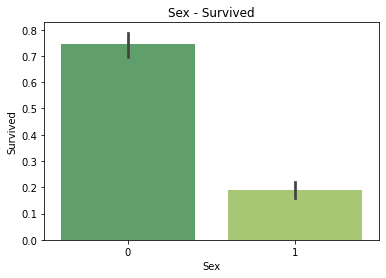

In [11]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

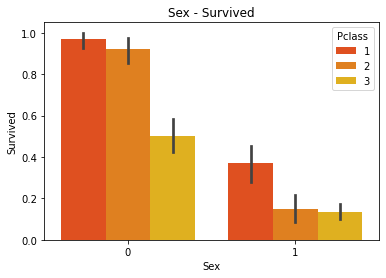

In [12]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

C:\Users\aspet\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


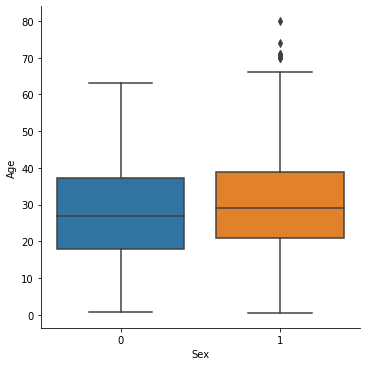

In [13]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

C:\Users\aspet\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


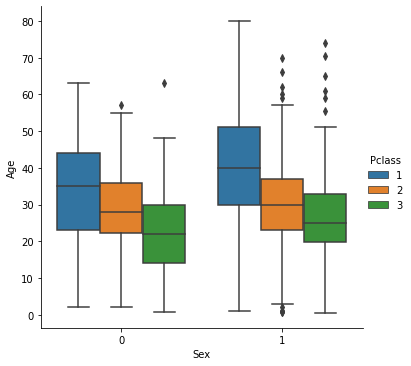

In [14]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [15]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [16]:
Data.dropna(subset=["Embarked"], inplace=True)
Data.shape

(884, 12)

**Задание 7.** Удалите из таблицы Data столбец Embarked.

In [17]:
Data.drop("Embarked", axis=1, inplace=True)

In [18]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [19]:
Data["Age"].value_counts()

24.00    30
22.00    27
30.00    25
19.00    25
28.00    25
         ..
55.50     1
70.50     1
36.50     1
14.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Заполним пропуски медианным значением Age.

In [20]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

C:\Users\aspet\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


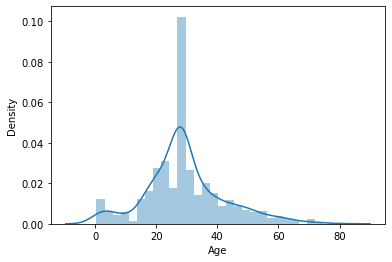

In [21]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

C:\Users\aspet\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


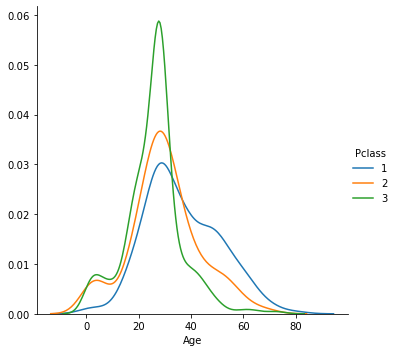

In [22]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверим, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполним их медианным значением Fare

In [23]:
Data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.3000      1
13.7917     1
14.1083     1
9.8375      1
17.4000     1
Name: Fare, Length: 246, dtype: int64

**Обработаем признак 'Pclass'**

In [24]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

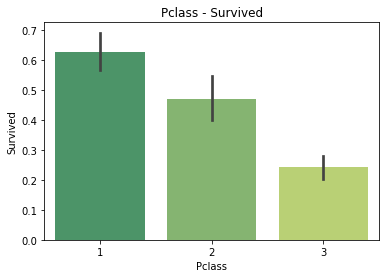

In [25]:
sns.barplot(x="Pclass", y="Survived", data=Data, palette="summer")
plt.title("Pclass - Survived")
plt.show()

Столбец PassengerId является категориальным и не несёт важной информации, удалим его.

In [26]:
Data.drop('PassengerId',axis=1,inplace=True)

In [27]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

Создадим таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [28]:
NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

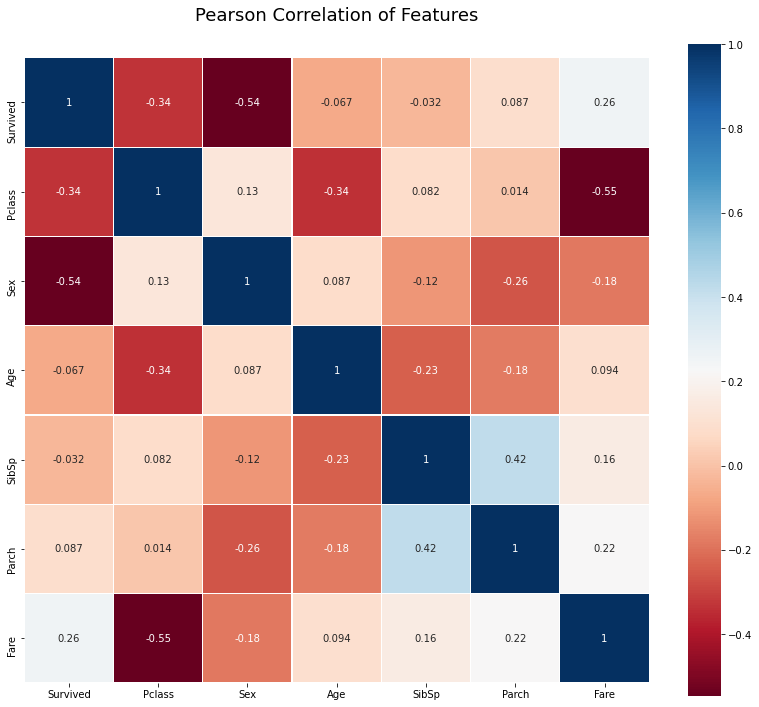

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

C:\Users\aspet\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


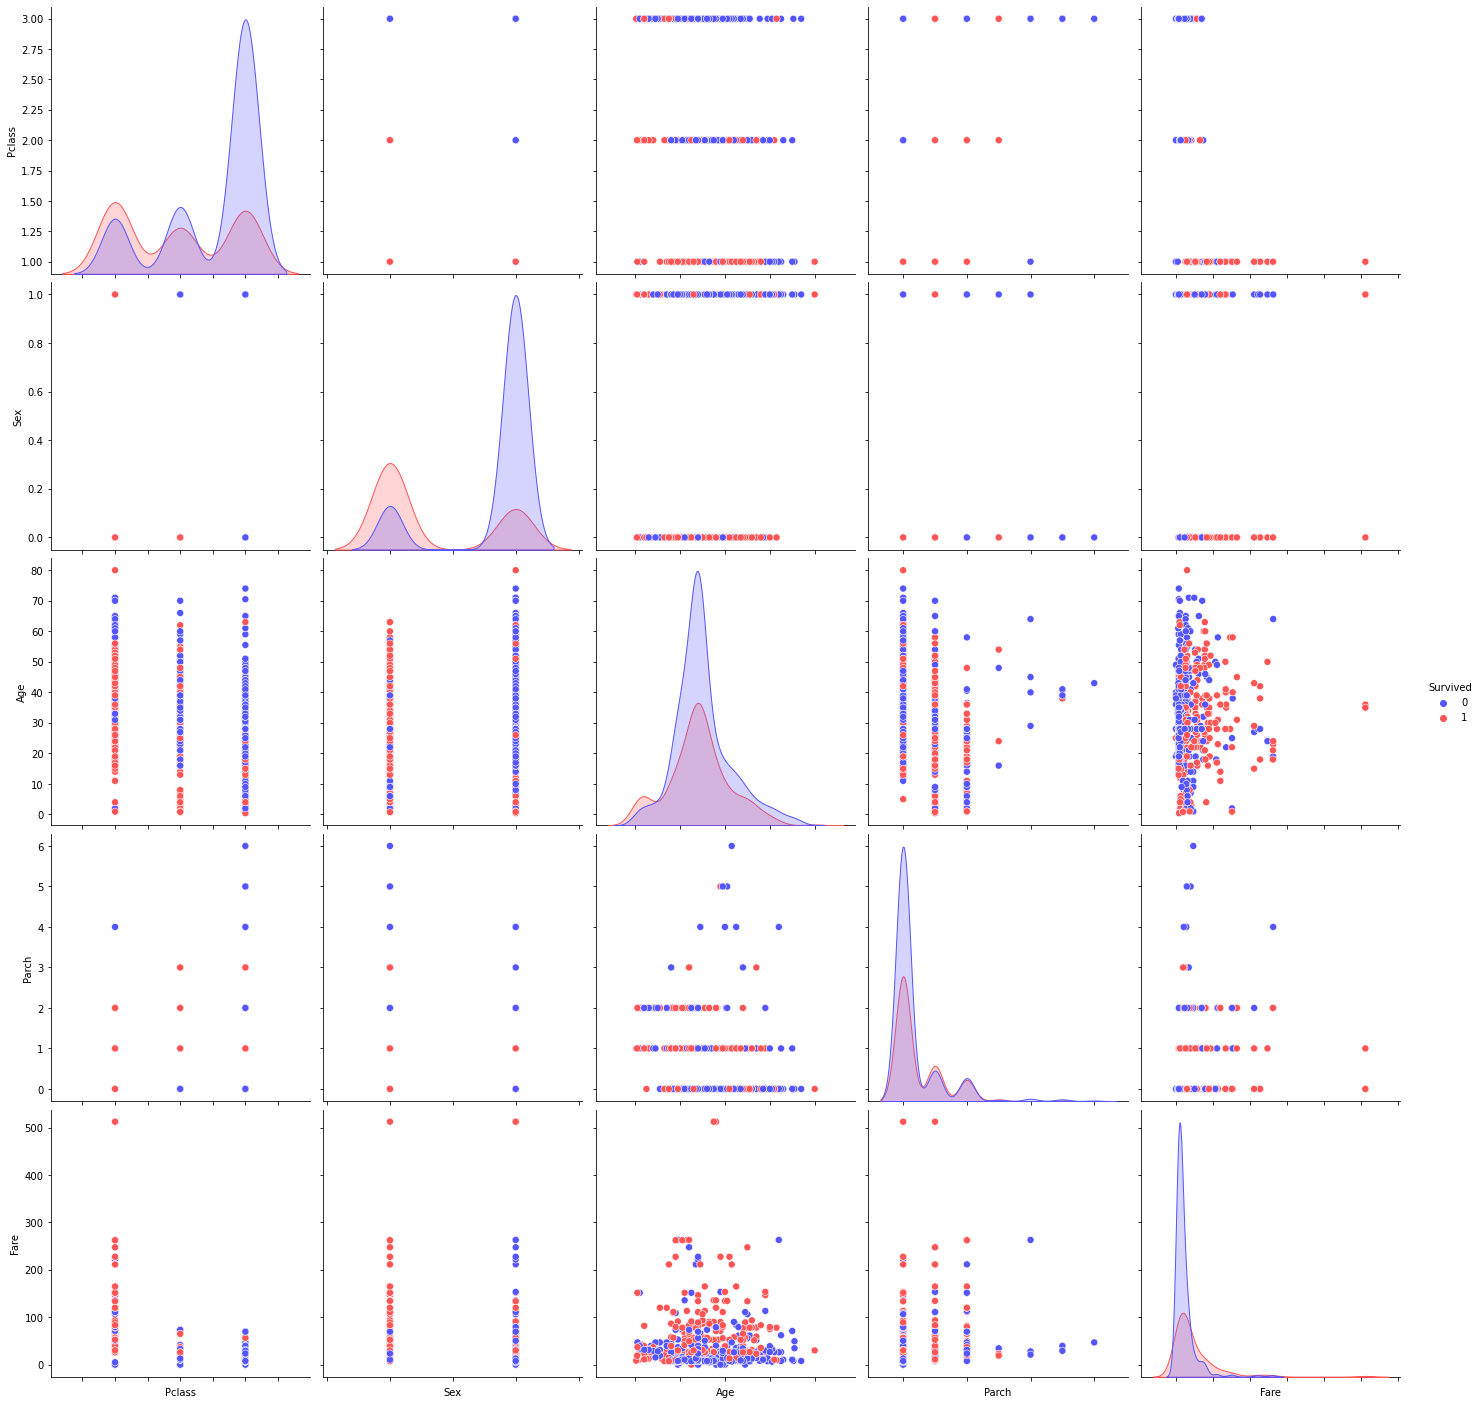

In [29]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

### Получение простого предсказания.

Мы видим, что больше всего влияют на выживаемость пол и класс:
* женщины, как правило, выживали
* мужчины, да ещё небогатые - нет
* больше погибших, чем выживших

In [30]:
def first_prediction(x):
    if x.Sex == 0:
        return 1
    if x.Sex == 1 and x.Pclass > 1:
        return 0
    return 0

In [31]:
Data['prediction'] = Data.apply(lambda x: first_prediction(x), axis=1)
Data[['Survived','prediction']]

,Survived,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


Посмотрим на качество нашего предсказания.

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(Data['Survived'], Data['prediction'])

0.7873303167420814

## Бонусная часть - домашнее задание (+1 балл к итоговой оценке).

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [33]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder. Полученные метки уже можно использовать как числовые признаки.

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 9.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [36]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)

Data['FareBin'].head()

0    (-0.512, 128.0]
1    (-0.512, 128.0]
2    (-0.512, 128.0]
3    (-0.512, 128.0]
4    (-0.512, 128.0]
Name: FareBin, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] < (384.0, 512.0]]

In [37]:
label = LabelEncoder()

Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])

Data[['Fare','FareBin','FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.512, 128.0]",0
1,71.2833,"(-0.512, 128.0]",0
2,7.9250,"(-0.512, 128.0]",0
3,53.1000,"(-0.512, 128.0]",0
4,8.0500,"(-0.512, 128.0]",0


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 10.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [38]:
Data['NameLen'] = Data['Name'].apply(lambda x: len(x))
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24


In [39]:
Data['FamilySize'] = Data.apply(lambda row: row['Parch'] + row['SibSp'] + 1, axis=1)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1


In [40]:
Data['IsAlone'] = Data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1


**Задание 11**. Выведите на экран визуализации, отражающие влияние новых созданных признаков на целевую переменную (Survived). Тип визуализации остается на ваше усмотрение.

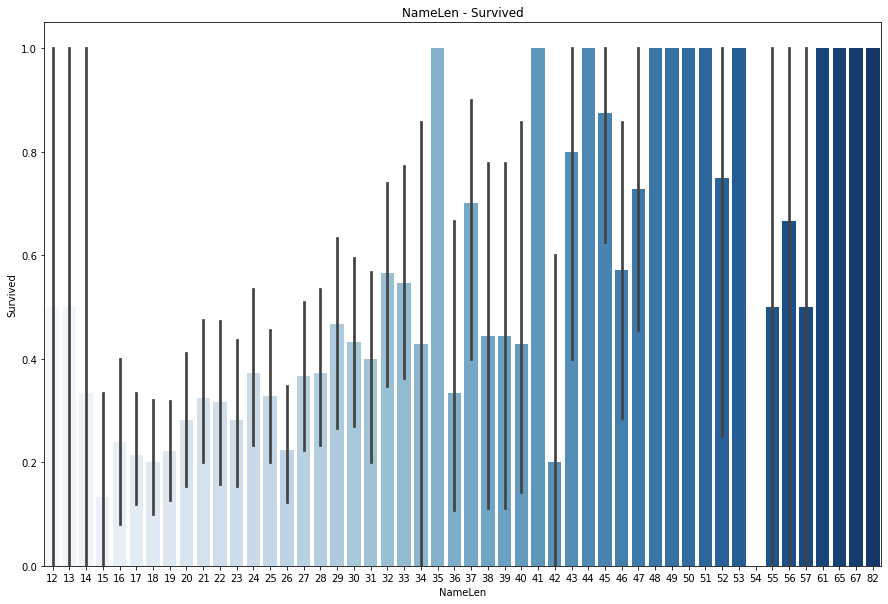

In [41]:
plt.figure(figsize=(15, 10))
sns.barplot(x='NameLen', y='Survived', data=Data, palette='Blues')
plt.title('NameLen - Survived')
plt.show()

Мда... Как-то оно рандомно.. Хотя что забавно, чем больше длина имени, тем выживали всё-таки больше. Возможно, это связано с тем, что в более длинных именах упоминаются должности типа Doctor, которые свидетельствуют о бОльшем достатке. А о достатке мы примерно знаем зависимость "чем богаче - тем выживабельнее" в данной ситуации. А короткие имена, скорее, у каких-то ноунеймов, о которых и информации особой нет. Тем не менее, сильной зависимости всё равно не наблюдается, о чём свидетельствует хаотичность высоты столбцов, например, с 34 по 44.

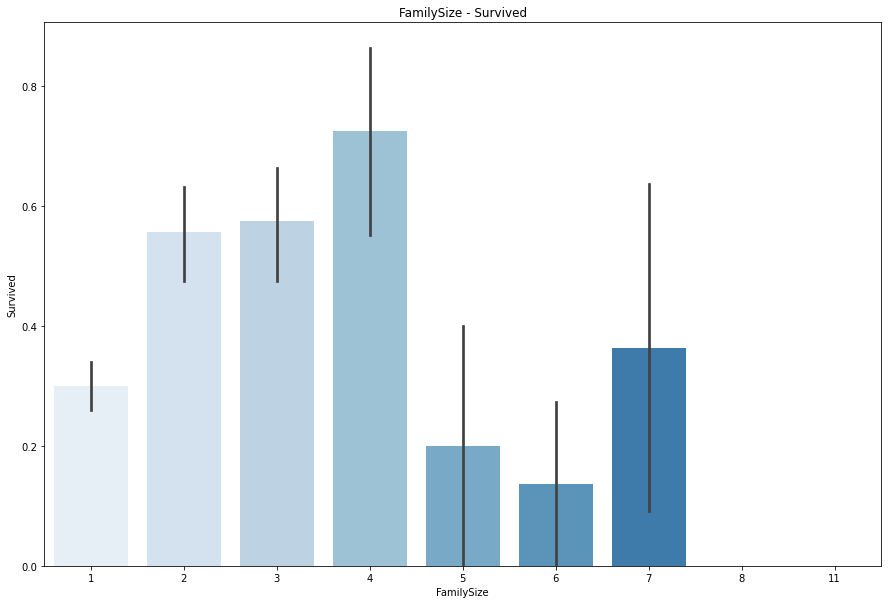

In [42]:
plt.figure(figsize=(15, 10))
sns.barplot(x='FamilySize', y='Survived', data=Data, palette='Blues')
plt.title('FamilySize - Survived')
plt.show()

Здесь наблюдается странная зависимость. Как будто бы люди с большой семьёй и без семьи скорее вымирают, а люди с небольшой (2-4 человека) семьёй - выживают. Пока не знаю, как это объяснить. Ещё ведь важно, сколько каких людей было. Вдруг получилось, что богатые люди (1 класс) путешествовали семьёй, а бедные(ну на борту Титаника совсем бедных не было, но, скажем, 3 класс) по-одиночке и поэтому мы видим такую зависимость. Странно, но пусть будет.

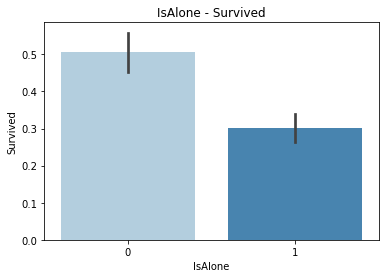

In [43]:
sns.barplot(x='IsAlone', y='Survived', data=Data, palette='Blues')
plt.title('IsAlone - Survived')
plt.show()

Ну вот здесь уже хорошая, понятная выжимка. Можно достаточно точно сказать, что с семьёй ты выживаешь 50/50, а вот без семьи шансы невелики. Неплохой признак. Сейчас посмотрим корреляции. 

**Задание 12.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

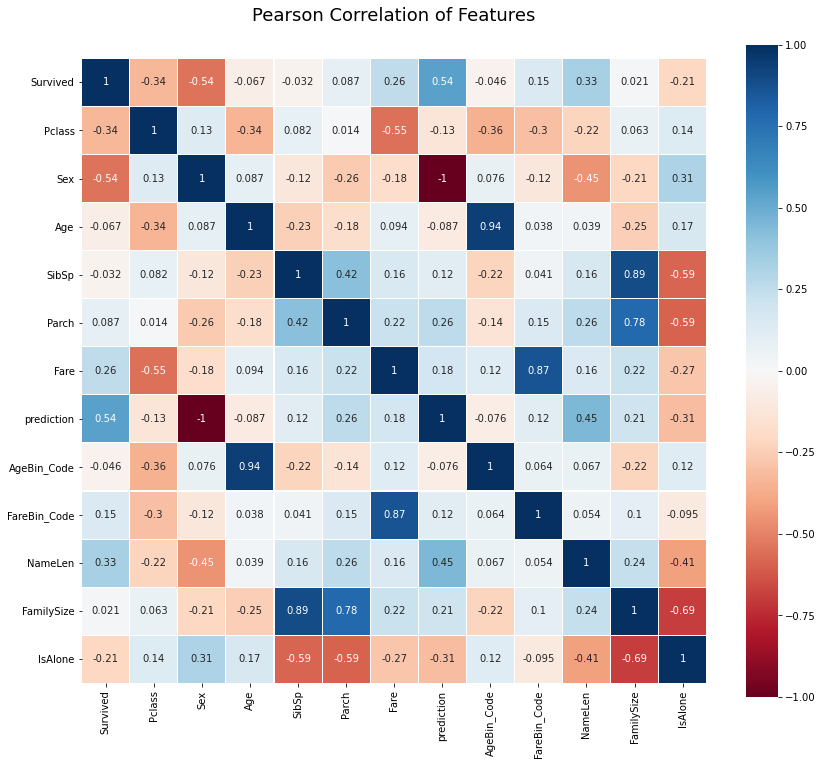

In [44]:
# Приношу извинения за копипаст, он слишком хорош.
# У нас случайно окажется признак prediction, потому что мы его считали с отдельном столбце - пока будем думать, что его нет.
NumericData = Data._get_numeric_data()
NumericData.head()

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Смотрите смотрите смотрите - IsAlone - это очень важно, только взгляните на эту корреляцию. Классный признак. А вот "странность" признака FamilySize подтвердилась низкой корреляцией. Неудивительно - зависимость там нелинейная и поэтому странно было бы видеть высокую корреляцию (мы уже выяснили, что выживали люди с небольшой семьёй, а с большой семьёй или без семьи - нет). Забавно, что NameLen оказывается более значимым (с точки зрения корреляции), чем Fare, - что-то в нём есть такое загадочное.

Что касается бинаризованных признаков - они показывают меньшую корреляцию, чем исходные признаки. Однако, если учитывать наш алгоритмический способ решения, оказывается существенным делить объекты на малое количество категорий, к которым мы легко сможем задать условия. Так что не зря мы делали бинарные признаки.

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 13*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью. Визуализируйте влияние новых признаков на целевую переменную.

In [45]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1


Заметим, что столбец Cabin мы совсем не используем. А кажется, что если число - это номер каюты, то буква - это какой-то отсек корабля. Возможно, палуба. Этот признак может оказаться существенным для нас

Для начала уберём все NaN, а затем закодируем признак.

In [46]:
Data['Cabin'] = Data['Cabin'].fillna('0')
Data['Cabin'] = Data['Cabin'].apply(lambda c: c[0] if c != '0' else '0')
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,0,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,0,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1


In [47]:
Data['Cabin'].value_counts()

0    682
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [48]:
sector = {"0": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
Data['Cabin'] = Data['Cabin'].map(sector)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,0,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,3,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,3,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,0,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1


Теперь посмотрим, насколько важен этот признак.

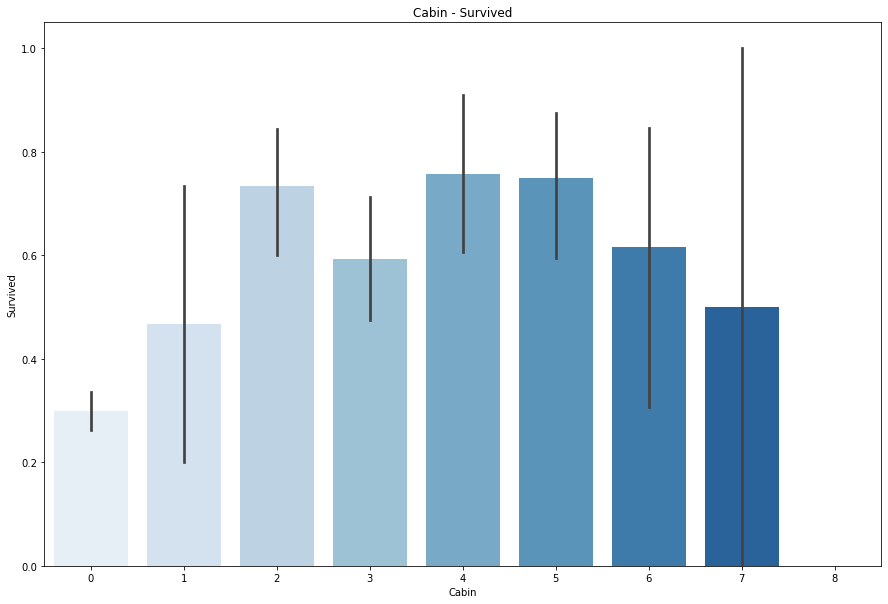

In [49]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Cabin', y='Survived', data=Data, palette='Blues')
plt.title('Cabin - Survived')
plt.show()

In [50]:
Data['Cabin'].value_counts()

0    682
3     59
2     45
4     33
5     32
1     15
6     13
7      4
8      1
Name: Cabin, dtype: int64

Давайте-ка бинаризуем признак, учитывая, что какие-то сектора определённо хороши - 2-6, а какие-то не очень (1, 7). А люди с неизвестной каютой вообще ооочень часто погибают. Так и запишем - 2-6 - 1, остальные - 0.

In [51]:
Data['CabinBin'] = Data['Cabin'].apply(lambda c: 1 if (2 <= c <= 6) else 0)
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,prediction,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone,CabinBin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,0,0,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,23,2,0,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,3,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,51,2,0,1
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",0,22,1,1,0
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,3,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,44,2,0,1
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,0,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",0,24,1,1,0


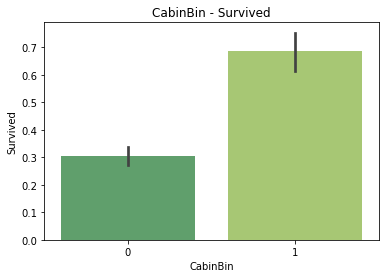

In [52]:
sns.barplot(x="CabinBin", y="Survived", data=Data, palette="summer")
plt.title("CabinBin - Survived")
plt.show()

Отличный признак. К сожалению, пока больше ничего придумать не могу.

**Задание 14.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

Полагаю, что нет. Нам важно не только как признак коррелирует с выживаемостью, но и как он коррелирует с другими признаками. По идее, хорошие признаки - это такие, что они сильно связаны с целевым признаком (не знаю, как сказать, у нас это выживаемость) и мало связаны между собой - то есть достаточно независимы, а не являются копиями друг друга. Например, набор "пол, класс пассажира, с семьёй или без" - достаточно неплохой набор, а вот "есть ли спутники, размер семьи, с семьёй или без" - посредственный набор признаков. Так что признак с небольшой корреляцией с выживаемостью, но с большой "независимостью" от другиз признаков может быть полезен в совокупности с другими "независимыми" признаками. В общем случае, он, конечно, проигрывает признакам с большой корреляцией и достаточной "независимостью".

**Задание 15.** Попробуйте улучшить предсказание нашей модели, используя, кроме признаков Sex и Pclass другие признаки.

Для начала, уберём лишние столбцы - билет, небинаризованные возраст и тариф, а так же FamilySize и другие семейные признаки (кроме IsAlone)

In [53]:
Data.drop('Name',axis=1,inplace=True)
Data.drop('Age',axis=1,inplace=True)
Data.drop('SibSp',axis=1,inplace=True)
Data.drop('Parch',axis=1,inplace=True)
Data.drop('Ticket',axis=1,inplace=True)
Data.drop('Fare',axis=1,inplace=True)
Data.drop('AgeBin',axis=1,inplace=True)
Data.drop('FareBin',axis=1,inplace=True)
Data.drop('Cabin',axis=1,inplace=True)
Data.drop('FamilySize',axis=1,inplace=True)
Data.head()

,Survived,Pclass,Sex,prediction,AgeBin_Code,FareBin_Code,NameLen,IsAlone,CabinBin
0,0,3,1,0,1,0,23,0,0
1,1,1,0,1,2,0,51,0,1
2,1,3,0,1,1,0,22,1,0
3,1,1,0,1,2,0,44,0,1
4,0,3,1,0,2,0,24,1,0


Очень симпатичная табличка.

Мы уже кое-что знаем - например, чем богаче - тем выживабельнее, женщины - выживают, люди с кабиной вида 1 - выживают, люди с семьёй выживают (когда я говорю "выживают - имеется в виду скорее выживут, чем нет").
Давайте реализуем предсказание на основе этого.

(здесь автор попробовал предсказать, получил ухудшение результата и расстроился)

Попробуем получше обобщить наши знания.

In [54]:
grouped = pd.pivot_table(Data,index=['Sex','Pclass', 'CabinBin', 'AgeBin_Code'],values=['Survived'],aggfunc=np.mean)
grouped

Survived
Sex Pclass CabinBin AgeBin_Code          
0   1      0        1            1.000000
                    2            1.000000
                    3            1.000000
           1        0            0.833333
                    1            0.969697
                    2            1.000000
                    3            0.933333
    2      0        0            1.000000
                    1            0.909091
                    2            0.894737
                    3            1.000000
           1        0            1.000000
                    1            1.000000
                    2            1.000000
                    3            0.000000
    3      0        0            0.545455
                    1            0.511111
                    2            0.250000
                    3            1.000000
           1        1            1.000000
1   1      0        0            1.000000
                    1            0.157895
                    2            0.400000
                    3            0.333333
                    4            0.333333
           1        0            1.000000
                    1            0.482759
                    2            0.448276
                    3            0.235294
                    4            0.000000
    2      0        0            0.714286
                    1            0.086207
                    2            0.043478
                    3            0.090909
                    4            0.000000
           1        0            1.000000
                    2            0.333333
    3      0        0            0.250000
                    1            0.137500
                    2            0.057692
                    3            0.000000
                    4            0.000000
           1        0            1.000000
                    1            0.250000
                    2            0.000000

Попробуем улучшить предсказание для женщин. С их данными вроде всё просто, однако есть странная группа, где выживали женщины 50/50. Изучим её подробнее.

In [56]:
strange_data = Data[(Data.Sex == 0) & (Data.Pclass == 3) & (Data.CabinBin == 0)]
strange_data.head()

,Survived,Pclass,Sex,prediction,AgeBin_Code,FareBin_Code,NameLen,IsAlone,CabinBin
2,1,3,0,1,1,0,22,1,0
8,1,3,0,1,1,0,49,0,0
10,1,3,0,1,0,0,31,0,0
14,0,3,0,1,0,0,36,1,0
18,0,3,0,1,1,0,55,0,0


In [57]:
strange_grouped = pd.pivot_table(strange_data,index=['AgeBin_Code', 'FareBin_Code', 'IsAlone'],values=['Survived'],aggfunc=np.mean)
strange_grouped

Survived
AgeBin_Code FareBin_Code IsAlone          
0           0            0        0.461538
                         1        0.857143
1           0            0        0.414634
                         1        0.591837
2           0            0        0.285714
                         1        0.000000
3           0            1        1.000000

Попробуем что ли предсказать.

In [59]:
def new_prediction(x):
    if x.Sex == 0:
        if x.Pclass == 3 and x.CabinBin == 0:
            if x.AgeBin_Code == 2 or x.IsAlone == 0:
                return 0
            else:
                return 1
        else:
            return 1
    return 0

In [60]:
Data['new_prediction'] = Data.apply(lambda x: new_prediction(x), axis=1)
accuracy_score(Data['Survived'], Data['new_prediction'])

0.8065610859728507

А вот и небольшое, но приятное улучшение. Думаю, с женщинами на основе тех данных, что у нас есть, лучше особо не получится, поэтому перейдём к исследованию мужчин.

In [61]:
grouped

Survived
Sex Pclass CabinBin AgeBin_Code          
0   1      0        1            1.000000
                    2            1.000000
                    3            1.000000
           1        0            0.833333
                    1            0.969697
                    2            1.000000
                    3            0.933333
    2      0        0            1.000000
                    1            0.909091
                    2            0.894737
                    3            1.000000
           1        0            1.000000
                    1            1.000000
                    2            1.000000
                    3            0.000000
    3      0        0            0.545455
                    1            0.511111
                    2            0.250000
                    3            1.000000
           1        1            1.000000
1   1      0        0            1.000000
                    1            0.157895
                    2            0.400000
                    3            0.333333
                    4            0.333333
           1        0            1.000000
                    1            0.482759
                    2            0.448276
                    3            0.235294
                    4            0.000000
    2      0        0            0.714286
                    1            0.086207
                    2            0.043478
                    3            0.090909
                    4            0.000000
           1        0            1.000000
                    2            0.333333
    3      0        0            0.250000
                    1            0.137500
                    2            0.057692
                    3            0.000000
                    4            0.000000
           1        0            1.000000
                    1            0.250000
                    2            0.000000

Данные получаются какие-то странные. Вот уже хочется сказать, что молодые мужчины выживают - а 3 класс с непонятными кабинами всё портит. Посмотрим ещё данные.

In [63]:
male_grouped = pd.pivot_table(Data[Data.Sex == 1],index=['Sex','Pclass', 'CabinBin', 'AgeBin_Code', 'IsAlone'],values=['Survived'],aggfunc=np.mean)
male_grouped

Survived
Sex Pclass CabinBin AgeBin_Code IsAlone          
1   1      0        0           0        1.000000
                    1           0        0.000000
                                1        0.166667
                    2           0        0.000000
                                1        0.444444
                    3           0        0.666667
                                1        0.166667
                    4           1        0.333333
           1        0           0        1.000000
                    1           0        0.428571
                                1        0.533333
                    2           0        0.500000
                                1        0.400000
                    3           0        0.222222
                                1        0.250000
                    4           0        0.000000
                                1        0.000000
    2      0        0           0        1.000000
                                1        0.000000
                    1           0        0.062500
                                1        0.095238
                    2           0        0.000000
                                1        0.066667
                    3           0        0.000000
                                1        0.111111
                    4           1        0.000000
           1        0           0        1.000000
                    2           0        0.000000
                                1        0.500000
    3      0        0           0        0.266667
                                1        0.166667
                    1           0        0.150000
                                1        0.135000
                    2           0        0.000000
                                1        0.073171
                    3           1        0.000000
                    4           1        0.000000
           1        0           0        1.000000
                    1           1        0.250000
                    2           1        0.000000

Совсем непонятно, что здесь происходит. Попробуем по-другому.

In [64]:
male_grouped2 = pd.pivot_table(Data[Data.Sex == 1],index=['CabinBin', 'AgeBin_Code','Pclass'],values=['Survived'],aggfunc=np.mean)
male_grouped2

Survived
CabinBin AgeBin_Code Pclass          
0        0           1       1.000000
                     2       0.714286
                     3       0.250000
         1           1       0.157895
                     2       0.086207
                     3       0.137500
         2           1       0.400000
                     2       0.043478
                     3       0.057692
         3           1       0.333333
                     2       0.090909
                     3       0.000000
         4           1       0.333333
                     2       0.000000
                     3       0.000000
1        0           1       1.000000
                     2       1.000000
                     3       1.000000
         1           1       0.482759
                     3       0.250000
         2           1       0.448276
                     2       0.333333
                     3       0.000000
         3           1       0.235294
         4           1       0.000000

Штош, мы хотя бы понимаем, что молодые мужчины или мальчики из 1 класса выживали. Впрочем, они во всех классах выживали, кроме тех несчастных из 3 класса с непонятной каютой. Также мы видим, что 3 и 4 возрастная группа это сразу смертный приговор. Насчёт первой и второй могут быть вопросы. Так и запишем.

In [68]:
def with_male_prediction(x):
    if x.Sex == 0:
        if x.Pclass == 3 and x.CabinBin == 0:
            if x.AgeBin_Code == 2 or x.IsAlone == 0:
                return 0
            else:
                return 1
        else:
            return 1
    if x.Sex == 1:
        if x.AgeBin_Code == 0 and x.Pclass != 3:
            return 1
        else:
            return 0
    return 0

In [69]:
Data['with_male_prediction'] = Data.apply(lambda x: with_male_prediction(x), axis=1)
accuracy_score(Data['Survived'], Data['with_male_prediction'])

0.8167420814479638

Немного подняли, отлично. Значит ключ может лежать в определении судьбы 1 и 2 возрастной группы.

In [78]:
key_group = Data[(Data.Sex == 1) & ((Data.AgeBin_Code == 1) | (Data.AgeBin_Code == 2))]

In [79]:
key_grouped = pd.pivot_table(key_group, index=['CabinBin', 'AgeBin_Code', 'Pclass'],values=['Survived'],aggfunc=np.mean)
key_grouped

Survived
CabinBin AgeBin_Code Pclass          
0        1           1       0.157895
                     2       0.086207
                     3       0.137500
         2           1       0.400000
                     2       0.043478
                     3       0.057692
1        1           1       0.482759
                     3       0.250000
         2           1       0.448276
                     2       0.333333
                     3       0.000000

Что-то мне хочется воспользоваться признаком с длиной имени. Бинаризуем его, пользуясь тем, что мужчины с короткими именами плоховато выживали, а с длинными уже есть нюансы.

In [75]:
Data['NameLen'] = Data['NameLen'].apply(lambda x: 1 if x > 30 else 0)
Data.head()

,Survived,Pclass,Sex,prediction,AgeBin_Code,FareBin_Code,NameLen,IsAlone,CabinBin,new_prediction,with_male_prediction
0,0,3,1,0,1,0,0,0,0,0,0
1,1,1,0,1,2,0,1,0,1,1,1
2,1,3,0,1,1,0,0,1,0,1,1
3,1,1,0,1,2,0,1,0,1,1,1
4,0,3,1,0,2,0,0,1,0,0,0


In [80]:
key_grouped2 = pd.pivot_table(key_group, index=['Pclass', 'NameLen'],values=['Survived'],aggfunc=np.mean)
key_grouped2

Survived
Pclass NameLen          
1      0        0.347222
       1        0.600000
2      0        0.097222
       1        0.000000
3      0        0.118081
       1        0.192308

Ну хоть что-то выявили - мужчины из 1 класса с длинными именами выживают, йоу. А если немного подробнее?

In [81]:
key_grouped3 = pd.pivot_table(key_group, index=['Pclass', 'FareBin_Code', 'CabinBin', 'NameLen'],values=['Survived'],aggfunc=np.mean)
key_grouped3

Survived
Pclass FareBin_Code CabinBin NameLen          
1      0            0        0        0.181818
                             1        0.600000
                    1        0        0.476190
                             1        0.555556
       1            0        0        0.000000
                    1        0        0.000000
       2            1        0        0.000000
       3            1        0        1.000000
                             1        1.000000
2      0            0        0        0.085714
                             1        0.000000
                    1        0        0.500000
                             1        0.000000
3      0            0        0        0.118959
                             1        0.173913
                    1        0        0.000000
                             1        0.333333

Ну вот теперь уже неплохо, появилась ещё группка (хотя есть подозрение, что там 2 человека, так что забьём пока). Реализуем, что получили.

In [84]:
def with_male_prediction_2(x):
    if x.Sex == 0:
        if x.Pclass == 3 and x.CabinBin == 0:
            if x.AgeBin_Code == 2 or x.IsAlone == 0:
                return 0
            else:
                return 1
        else:
            return 1
    if x.Sex == 1:
        if x.AgeBin_Code == 0 and x.Pclass != 3:
            return 1
        elif x.Pclass == 1 and x.NameLen == 1:
            return 1
        else:
            return 0
    return 0

In [85]:
Data['with_male_prediction_2'] = Data.apply(lambda x: with_male_prediction_2(x), axis=1)
accuracy_score(Data['Survived'], Data['with_male_prediction_2'])

0.8246606334841629

Мда... Мы выиграли ещё процентный пунктик, но это всё ещё несущественный прирост. Пока непонятно, какими именно признаками руководствоваться для построения понятной алгоритмической модели на ифах. Это так странно звучит - модель на ифах. Однако сам факт того, что мы в начале сказали - женщины выживают, а мужчины нет и получили точность около 80 - это уже круто. Люди там спорят, какие модели в машинке тут можно использовать, а какие нет, что у них 60% точности выдаёт, а что 80%. А оказывается, можно +- тупо заифать и получить сколько-нибудь приемлемую точность. Полезный урок!

In [ ]:
Спасиб